In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

# 이미지 복원!!   

경사하강법을 통해 망가진 이미지를 복원해보자!!      
-----------------
방법 : 내가 임의로 만든 이미지를 기존 이미지를 망쳐 놓은 함수에 넣어서 임의로 이미지를 망친 다음에 그 이미지와 기존 망가진 이미지를 비슷하게 만들도록 반복하면 함수에 넣기 전 사진을 유추할 수 있다...!

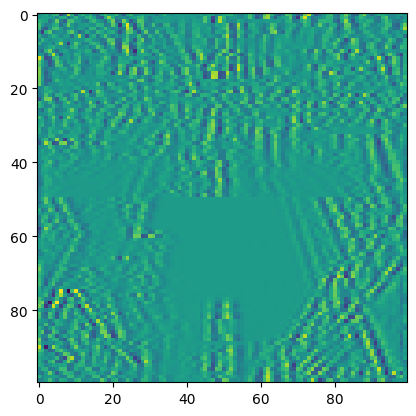

In [2]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding = 'latin1')) #이미지 불러오기
plt.imshow(broken_image.view(100,100))

In [3]:
# 위 이미지는 아래 weird_function() 함수로 인해 망가짐
def weird_function(x,n_iter=5): 
    h = x
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor,h[:-1]),0)
        h_r = torch.cat((h[1:],zero_tensor),0)
        h = filt[0]*h+filt[2]*h_l + filt[1]*h_r
        if i%2 == 0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [4]:
def distance_loss(hypothesis,broken_image): #내가 만든 망가진 이미지와 기존 망가진 이미지의 거리를 구하기
    return torch.dist(hypothesis,broken_image)

In [5]:
random_tensor = torch.randn(10000,dtype = torch.float) #랜덤 이미지(내 이미지) 만들기

In [6]:
lr = 0.8 #학습률 정하기

In [9]:
for i in range(0,20000):
    random_tensor.requires_grad_(True) #오차 함수를 랜덤 탠서로 미분하기 위해 requires_grad를 True로 바꿈
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image) #기존 이미지와의 거리 구하기
    loss.backward() #오차를 랜덤 탠서로 미분한다
    with torch.no_grad(): #자동 기울기 계산을 꺼준다...
        random_tensor = random_tensor - lr*random_tensor.grad #random_tensor.grad에는 loss.backward에서 구한 미분값이 들어가있음
    if i%1000 == 0:
        print('Loss at {} = {}'.format(i,loss.item()))

Loss at 0 = 12.299656867980957
Loss at 1000 = 1.1544438600540161
Loss at 2000 = 0.5508681535720825
Loss at 3000 = 0.3810425400733948
Loss at 4000 = 0.300505131483078
Loss at 5000 = 0.25131601095199585
Loss at 6000 = 0.21587246656417847
Loss at 7000 = 0.18771997094154358
Loss at 8000 = 0.16395875811576843
Loss at 9000 = 0.14304646849632263
Loss at 10000 = 0.12406745553016663
Loss at 11000 = 0.10644356161355972
Loss at 12000 = 0.08979741483926773
Loss at 13000 = 0.07387688010931015
Loss at 14000 = 0.05850974842905998
Loss at 15000 = 0.0435759574174881
Loss at 16000 = 0.028991440311074257
Loss at 17000 = 0.021153831854462624
Loss at 18000 = 0.021165456622838974
Loss at 19000 = 0.021167362108826637


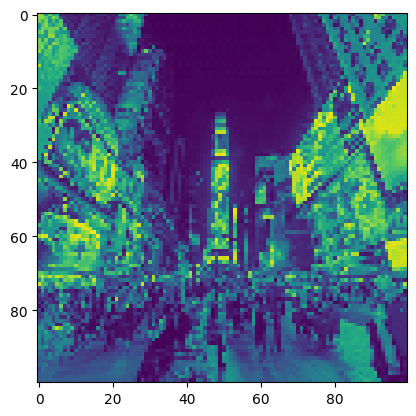

In [10]:
plt.imshow(random_tensor.view(100,100).data) #구한 이미지 출력하기!! (답 : 타임스퀘어)

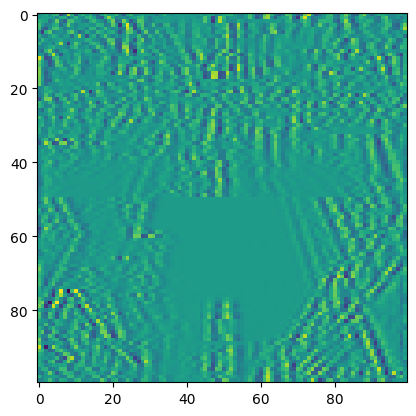

In [13]:
plt.imshow(broken_image.view(100,100).data)